# House Price Prediction Project

### Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

print("Shape of df_train", df_train.shape)
print("Shape of df_test", df_test.shape)


Shape of df_train (1460, 81)
Shape of df_test (1459, 80)


## Basic Data Exploration

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


To see all the columns and rows of the df

In [5]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### The number of feautres is very high (80!). This is going to be a very complex thing to sort and assemble it in terms of numbers. 
Also, most of the features are categorical, so simple onehotencoding isnt going to work here. A bit of researh like how much to rate/ give numerical values if the garage size is x sq.ft, etc . I also have to look at some engineering concepts or domain knowledge as this requires the conversion of categorical features into numeric ones and to do so the value of each features ahs to be asessed beforehand!! Let's go, going to be tough but will teach a lot, and yeah i use LLMs ike chatGPT, Claude etc a lot for every project. And, Why not? 

### Some important Features

#### Will use thee features for encoding

- NEighbourhood
- OverallQual
- OverllCond
- YEarBuilt
- Foundation
- Electrical
- KitchenQual
- GarageType
- GarageFinish
- Fence


Combining both train and test data

In [8]:
df = pd.concat([df_train, df_test])
print("Shape of combined DataFrame",df.shape)

Shape of combined DataFrame (2919, 81)


# EDA

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

# Findings

- "Alley" to be dropped
- "FireplaceQual" to be dropped
- "PoolQC" to be dropped
- "Fence" to be dropped
- "MiscFeature" to be dropped

### Note: SalePrice also has a lot of mising values, but, we cant drop that column as it is most important feature for our prediction

In [11]:
int_features = df.select_dtypes(include=['int64']).columns
print("Total No. of Integer Features : ", int_features.shape[0])
print("Names of the Integer Features : ", int_features.tolist())

Total No. of Integer Features :  26
Names of the Integer Features :  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


Doing the same for Float dtype

In [12]:
float_feature = df.select_dtypes(include=['float64']).columns
print("Total No. of Float features : ",float_feature.shape[0])
print("Names of the Flaot Features : ",float_feature)

Total No. of Float features :  12
Names of the Flaot Features :  Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')


In [123]:
cat_features = df.select_dtypes(include=['object']).columns
print("Total No. of Categorical Features : ", cat_features.shape[0])
print("Names of the Categorical Features : ", cat_features)

Total No. of Categorical Features :  43
Names of the Categorical Features :  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


# Statistical Analysis 

In [14]:
df.describe()  ## For all columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


##### In LotFrontAge Column
- 75% has unit value of 80 but, max has 313. Very drastic difference indicating the preence of an Outlier/s.
- BsmtFinSF1 Column
- follows the same , outlier effect
- Same for MasVnrArea, SalePrice, etc.

### Data Cleaning Process Continues

### Missing Valuess

Visualizing it using heatmap

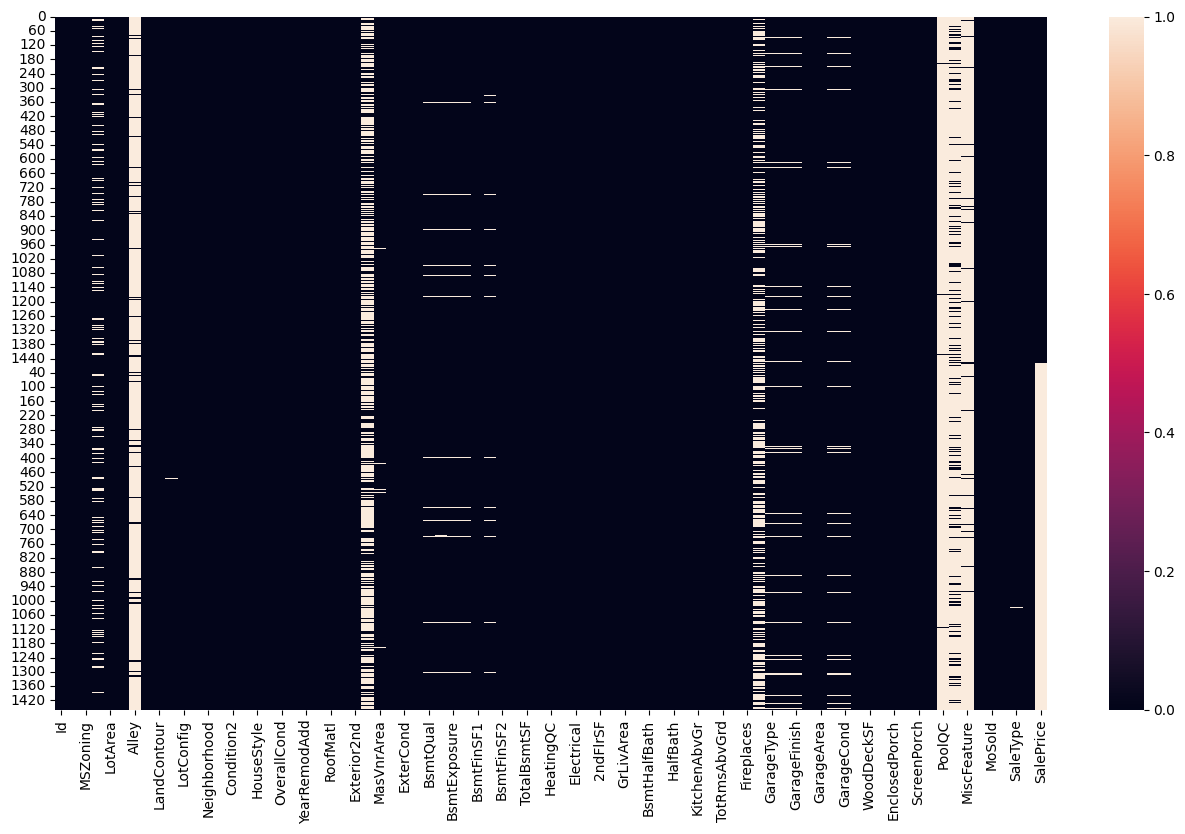

In [15]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("plots_img/heatmap_DF_of_Null_Values.png")

- White shows Column having maximum Null Values
- Dark shows column with the lowest Null Values

In [16]:
df = df.set_index("Id")

#### Findings:
These Columns have a large number of missing values ->

- "Alley"
- "FirePlaces"  
- "PoolQC"
- "MiscFeature"
- "SalePrice" 
- "Fence" 
Note: "Fence" column has been hidden in the heatmap somehow, but, we had already seen in the basic exploration, thta it had a large no. of missing values too!

In [17]:
## Count of Null values 
null_count = df.isnull().sum()
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

#### In Percentage:

In [18]:
# Get the percentages of null value
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

In [19]:
miss_value_50_perc = null_percent[null_percent > 50]
miss_value_50_perc


Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

#### We cannot just remove these columns directly , had to look it first manually
As these columns does have the values, NA asically represents that that particuclar feature is not available in the house.
We will replace the NA with some constant value

In [20]:
miss_value_20_50_perc = null_percent[(null_percent > 20) & (null_percent < 51)]
miss_value_20_50_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

same with FireplaceQu feature, they are not actually missing values but representing the absence of fireplace in the house .

In [21]:
miss_value_5_20_perc = null_percent[(null_percent > 5) & (null_percent < 21)]
miss_value_5_20_perc

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

There is a pattern for Garrage feature like most has 5% bucket for NA . Will look after LotFrontAge

In [22]:
df['LotFrontage'].value_counts().head()

LotFrontage
60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: count, dtype: int64

<Axes: ylabel='Id'>

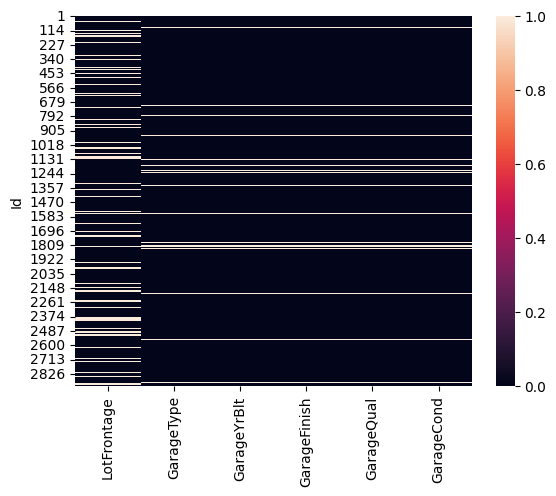

In [23]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

Drop Columns/Features
As per manual oservation of the data, we will not drop any column/feature from the dataset

## Handling Missing Values

In [24]:
missing_value_feat = null_percent[null_percent > 0]
print("Total missing value features : ", len(missing_value_feat))

Total missing value features :  35


In [25]:
missing_value_feat

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [26]:
cat_na_feat = missing_value_feat[missing_value_feat.keys().isin(cat_features)]
print("Total No. of Categorical Missing Features : ", len(cat_na_feat)) 

Total No. of Categorical Missing Features :  23


Doing the same for integer features

In [27]:
int_na_feat = missing_value_feat[missing_value_feat.keys().isin(int_features)]
print("Total No. of integer missing features : ", len(int_na_feat))

Total No. of integer missing features :  0


For Float

In [28]:
float_na_feat = missing_value_feat[missing_value_feat.keys().isin(float_feature)]
print("Total No. of Float Missing Features : ", len(float_na_feat))
float_na_feat

Total No. of Float Missing Features :  12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

## Filling missing values ( Imputation)

handling MSZoning ( 0.137033 )

In [29]:
### Filling missing values for MSZoning Feature
df['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

for normal distn, we can impte wiht the mean , ut not in the case of left or riht skewed distriution

<Axes: xlabel='MSZoning', ylabel='count'>

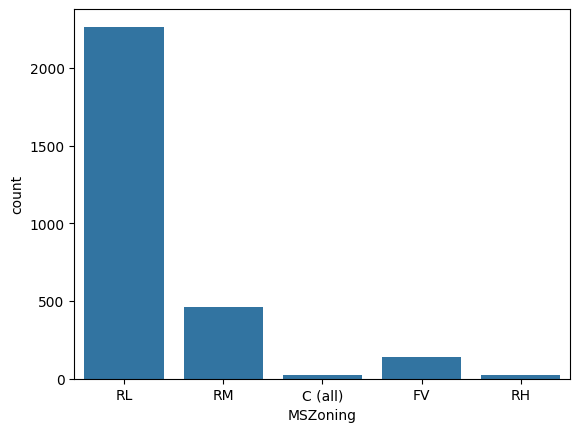

In [30]:
sns.countplot(x="MSZoning",data=df)

In [31]:
## backup of df (df misssing value imputation , mvi)
df_mvi = df.copy()

In [32]:
mszoning_mode = df_mvi['MSZoning'].mode()[0]
mszoning_mode

'RL'

In [33]:
mszoning_mode = df_mvi['MSZoning'].mode()[0]
df_mvi['MSZoning'].replace(np.nan, mszoning_mode)
df_mvi['MSZoning'].isnull().sum()

np.int64(4)

<Axes: xlabel='MSZoning', ylabel='count'>

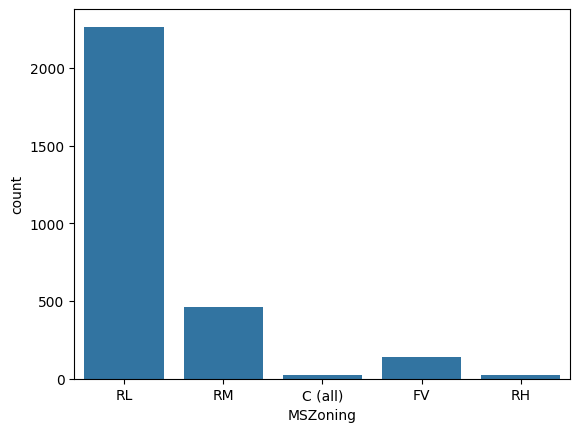

In [34]:
sns.countplot(x="MSZoning",data=df_mvi)

creating a function as this si going to be used again and again.

In [35]:
def oldnewCountPlot(df, df_new, feature):
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    sns.countplot(x=feature, data=df, color='brown')
    plt.title("Old DataFrame")
    plt.subplot(1,2,2)
    sns.countplot(x=feature, data=df_new, color='orange')
    plt.title("New DataFrame")
    plt.show()

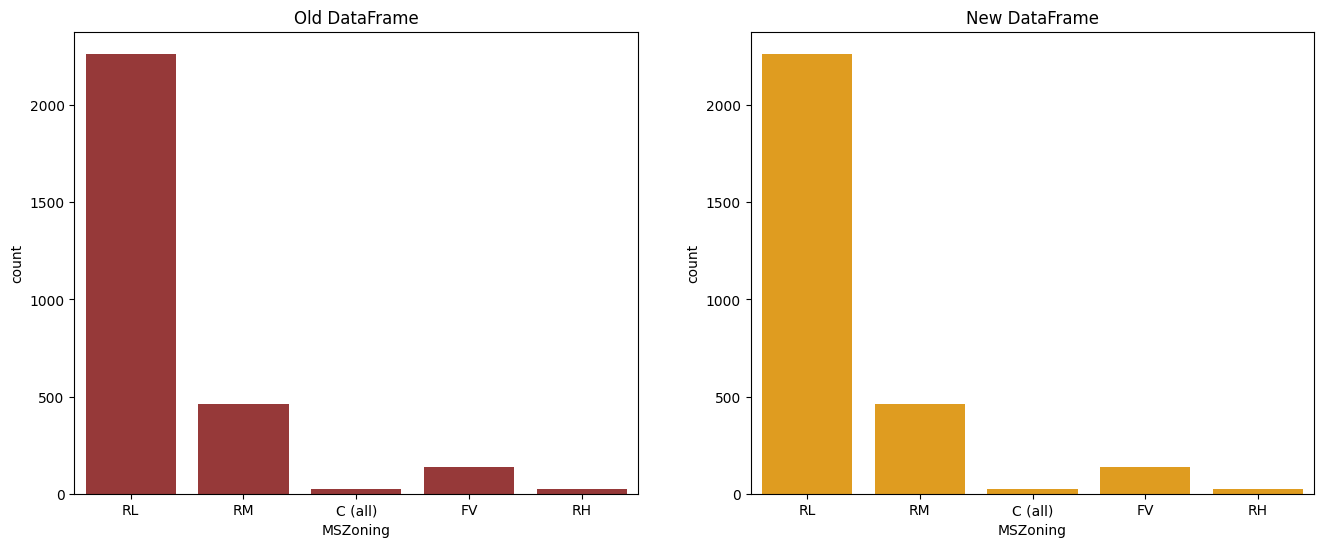

In [36]:
oldnewCountPlot(df, df_mvi, "MSZoning")

Handling Ally Feature

In [37]:
df_mvi['Alley'].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [38]:
## Replacing with NA where nan is present
alley_const = "NA"
df_mvi['Alley'].replace(np.nan, alley_const, inplace=True)
df_mvi['Alley'].isnull().sum()

/var/folders/49/z4dsjwnj3bz30nknl9ffld4h0000gn/T/ipykernel_8719/2274312885.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Alley'].replace(np.nan, alley_const, inplace=True)


np.int64(0)

Visualizing the distribution

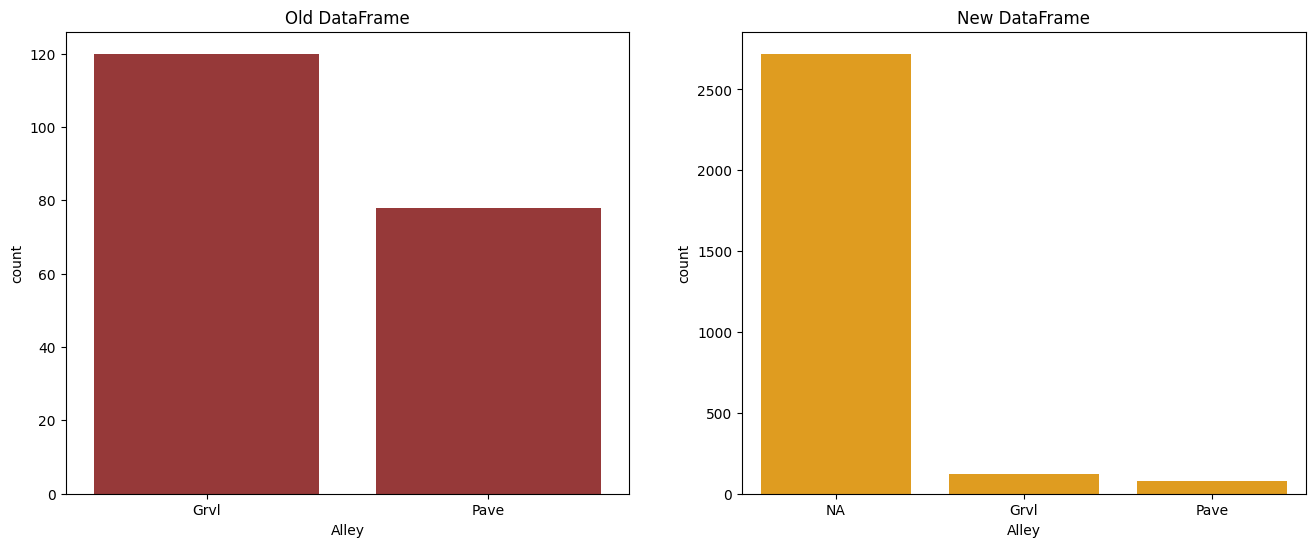

<Figure size 1200x600 with 0 Axes>

In [39]:
oldnewCountPlot(df, df_mvi, "Alley")
plt.figure(figsize=(12,6))
plt.show()

replaced the nan NA with string "NA" as ML model doesnt work with nan ( actual NA ). # Justification🙂

Now, LotFrontAge Column,

In [40]:
## for numerical feature imputation, we do so with either mean or median

In [41]:
def boxhistPlot(df, figsize=(16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    sns.boxplot(df)
    plt.subplot(1,2,2)
    sns.histplot(df, kde=True)
    plt.show()

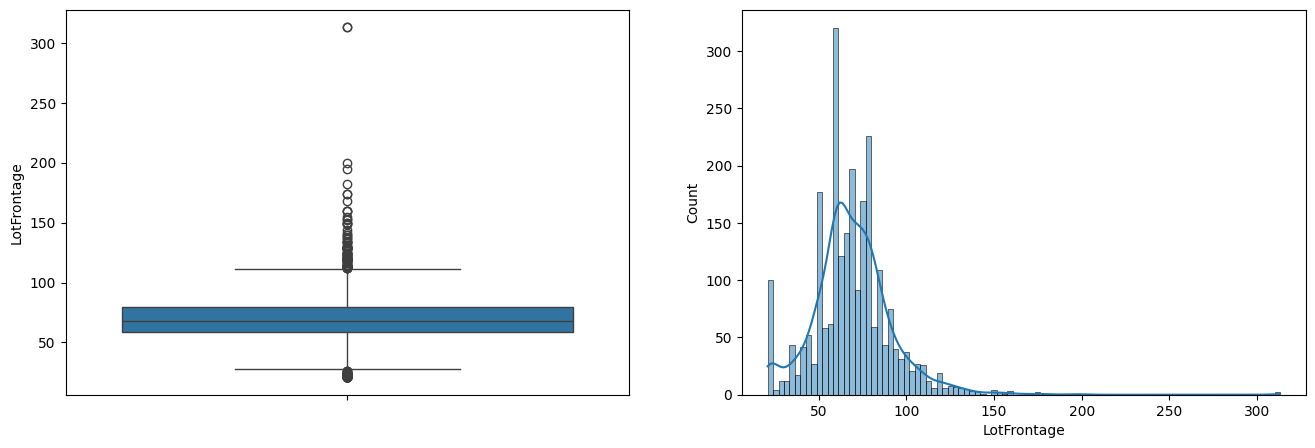

In [42]:
boxhistPlot(df['LotFrontage'])

Clearly visible, the outliers and the right skewness, and for the skewed distn, we follow median for imputation

In [43]:
lotfrontage_median = df_mvi['LotFrontage'].median()
lotfrontage_median

np.float64(68.0)

In [44]:
df_mvi['LotFrontage'].replace(np.nan, lotfrontage_median, inplace=True)
df_mvi['LotFrontage'].isnull().sum()

/var/folders/49/z4dsjwnj3bz30nknl9ffld4h0000gn/T/ipykernel_8719/3763799258.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['LotFrontage'].replace(np.nan, lotfrontage_median, inplace=True)


np.int64(0)

In [45]:
def oldNewBoxHistPlot(df, df_new, feature):
    plt.figure(figsize=(16,6))

    plt.subplot(2,2,1)
    sns.boxplot(df[feature], color='brown')
    plt.title("Old DataFrame")

    plt.subplot(2,2,2)
    sns.histplot(df[feature], color='orange')
    plt.title("Old DataFrame")

    plt.subplot(2,2,3)
    sns.boxplot(df_new[feature], color='brown')
    plt.title("New DataFrame")

    plt.subplot(2,2,4)
    sns.histplot(df_new[feature], kde=True)
    plt.title("New DataFrame")
    plt.show()

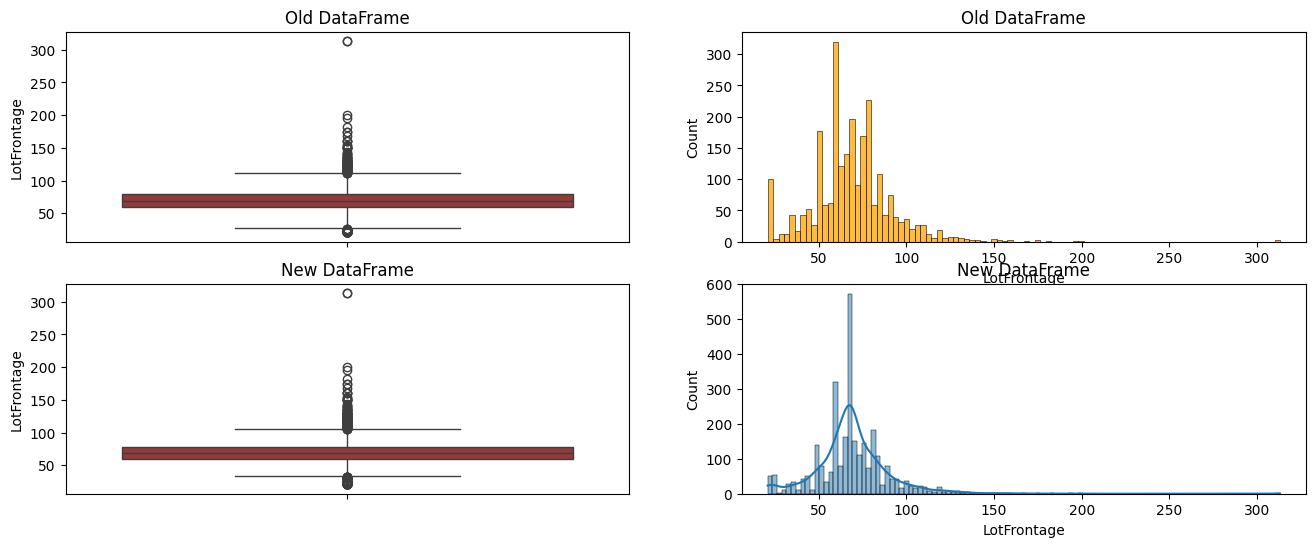

In [46]:
oldNewBoxHistPlot(df, df_mvi, 'LotFrontage')

Handling Utilities NA values

In [48]:
df['Utilities'].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [49]:
utilities_mode = df['Utilities'].mode()[0]
utilities_mode

'AllPub'

In [50]:
df_mvi['Utilities'].replace(np.nan, utilities_mode, inplace=True)

Checking 

In [51]:
df_mvi['Utilities'].isnull().sum()

np.int64(0)

### Exterior1st and Exterior2nd Feature handling

In [52]:
df['Exterior1st'].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

Filling with the mode value

In [54]:
exterior1st_mode = df['Exterior1st'].mode()[0]
exterior1st_mode

'VinylSd'

In [56]:
df_mvi['Exterior1st'].replace(np.nan, exterior1st_mode, inplace=True)
df_mvi['Exterior1st'].isnull().sum()

np.int64(0)

Doing the same for Exterior2nd

In [57]:
df['Exterior2nd'].value_counts()
exterior2nd_mode = df['Exterior2nd'].mode()[0]
exterior2nd_mode

'VinylSd'

In [59]:
df_mvi['Exterior2nd'].replace(np.nan, exterior2nd_mode, inplace=True)
df_mvi["Exterior2nd"].isnull().sum()

np.int64(0)

Now, MasVnrType and MasVnrArea

In [63]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

<Axes: ylabel='Id'>

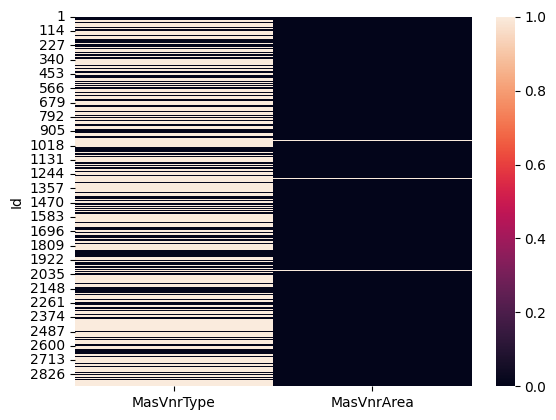

In [65]:
sns.heatmap(df[["MasVnrType", "MasVnrArea"]].isnull())

In [ ]:
df[df[["MasVnrType", "MasVnrArea"]].isnull().any(axis=1)].head(10)

In [70]:
df['MasVnrType'].value_counts()


MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [72]:
### Filling missing values for MasVnrType and MasVnrArea mode
masvnrtype_mode = df["MasVnrType"].mode()[0]
df_mvi['MasVnrType'].replace(np.nan, masvnrtype_mode,inplace=True )
df_mvi['MasVnrType'].isnull().sum()

np.int64(0)

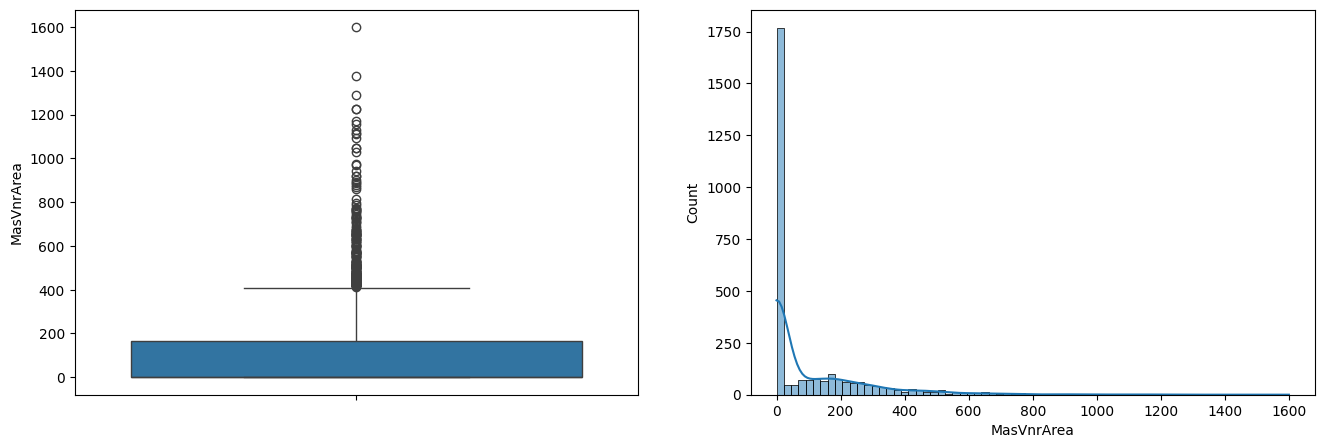

In [73]:
## Doing the same for MasVnrArea
boxhistPlot(df['MasVnrArea'])

Outliers exist here as 75% has avg of 164 while maximum is 1600

In [99]:
masvnrarea_const = 0
df_mvi['MasVnrArea'].replace({np.nan:masvnrarea_const}, inplace=True)
df_mvi['MasVnrArea'].isnull().sum()


/var/folders/49/z4dsjwnj3bz30nknl9ffld4h0000gn/T/ipykernel_8719/3844864520.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['MasVnrArea'].replace({np.nan:masvnrarea_const}, inplace=True)


np.int64(0)

#### Handling Basement Features
##### Basement_features: Categorical
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2

##### Basement_features: Numerical
- BsmtFinSF1
- BsmtFinSF2
- BsmtuUnfSF
- TotalBsmtSF
- BsmtFullBath
- BsmtHalfBath


In [79]:
## Setting these in catgeroical and numerical features named variable

cat_bsmt_feat = ["BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2"]

num_bsmt_feat = ["BsmtFinSF1",
"BsmtFinSF2",
"BsmtUnfSF",
"TotalBsmtSF",
"BsmtFullBath",
"BsmtHalfBath"]

Categorical features have higherr missing value percentage as compared to Numerical Features

<Axes: ylabel='Id'>

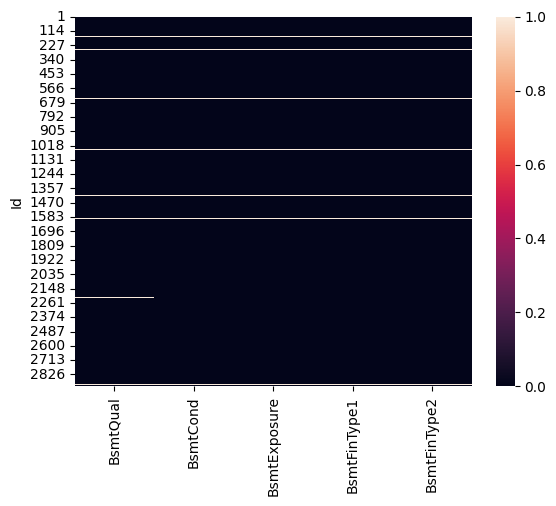

In [81]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [100]:
for feat in cat_bsmt_feat:
    print(f'Value Count for {feat}: {df[feat].value_counts()}')

Value Count for BsmtQual: BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
Value Count for BsmtCond: BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
Value Count for BsmtExposure: BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
Value Count for BsmtFinType1: BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
Value Count for BsmtFinType2: BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [93]:
## Replacing with strng "NA"

bsmt_const = "NA"
for feat in cat_bsmt_feat:
    df_mvi[feat].replace(np.nan, bsmt_const, inplace=True)

print("Missing Values in Categorical Basement Features: ", df_mvi[cat_bsmt_feat].isnull().sum())


Missing Values in Categorical Basement Features:  BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64


/var/folders/49/z4dsjwnj3bz30nknl9ffld4h0000gn/T/ipykernel_8719/4057458704.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, bsmt_const, inplace=True)


<Axes: ylabel='Id'>

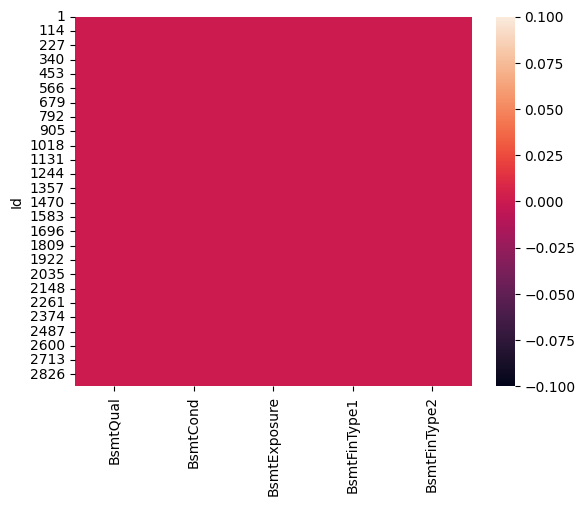

In [103]:
sns.heatmap(df_mvi[cat_bsmt_feat].isnull())

In [ ]:
df_bsmt = df[cat_bsmt_feat + num_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis=1)]

In [106]:
bsmt_num = 0
for feat in num_bsmt_feat:
    df_mvi[feat].replace(np.nan, bsmt_num, inplace=True)
df_mvi[num_bsmt_feat].isnull().sum()

/var/folders/49/z4dsjwnj3bz30nknl9ffld4h0000gn/T/ipykernel_8719/2465525070.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, bsmt_num, inplace=True)


BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

ElectricalQual and KitchenQual Handling

In [107]:
df['Electrical'].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [108]:
df["KitchenQual"].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [110]:
df_ekk = df[["Electrical", "KitchenQual", "KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1
1556,SBrkr,NaN,1


In [120]:
## Replacing with the mode
electrical_mode = df['Electrical'].mode()[0]
df_mvi['Electrical'] = df_mvi['Electrical'].replace(np.nan, electrical_mode)
print("The Null values in Electrical Feature Column: ", df_mvi['Electrical'].isnull().sum())

The Null values in Electrical Feature Column:  0


DOing the same with KitchenQual and KitchenAbvGr

In [118]:
kitchenqual_mode = df['KitchenQual'].mode()[0]
df_mvi['KitchenQual'] = df_mvi['KitchenQual'].replace(np.nan, kitchenqual_mode)
print("The Null values in KitchenQual Feature Column: ", df_mvi['KitchenQual'].isnull().sum())

The Null values in KitchenQual Feature Column:  0


In [122]:
kitchenabvgr_mode = df['KitchenAbvGr'].mode()[0]
df_mvi['KitchenAbvGr'] = df_mvi['KitchenAbvGr'].replace(np.nan, kitchenabvgr_mode)
print("The Null values in KitchenAbvGr Feature Column: ", df_mvi['KitchenAbvGr'].isnull().sum())

The Null values in KitchenAbvGr Feature Column:  0


## Writing function to replace the nan valuues with the mode ( to sae time, # efficiency)

In [129]:
def replace_nan_with_mode(df, feature):
    mode_val = df[feature].mode()[0]
    df[feature] = df[feature].replace(np.nan, mode_val)
    print(f"The Null values in {feature} Feature Column: ", df[feature].isnull().sum())

### Handling Remaining Categorical Features

- Functional
- FireplaceQual
- PoolQc
- Fence
- MiscFeature
- SaleType

In [125]:
df['Functional'].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [127]:
df['SaleType'].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

Functional NAN handling ( with defined function )

In [132]:
replace_nan_with_mode(df_mvi, 'Functional')

The Null values in Functional Feature Column:  0


SaleType nan handling wiht the defined function

In [133]:
replace_nan_with_mode(df_mvi, 'SaleType')

The Null values in SaleType Feature Column:  0


Now , time for last few features
- FireplaceQual
- PoolQc
- Fence
- MiscFeature

In [134]:
other_cat_feat = ['FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
for feat in other_cat_feat:
    print(f"Value Count for {feat}: {df[feat].value_counts()}")

Value Count for FireplaceQu: FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
Value Count for PoolQC: PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
Value Count for Fence: Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
Value Count for MiscFeature: MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64


FireplaceQu handling

In [138]:
fireplacequ_const = "NA"
df_mvi['FireplaceQu'].replace(np.nan, fireplacequ_const, inplace=True)
print("The null values in feature FireplaceQu : ",df_mvi['FireplaceQu'].isnull().sum())

The null values in feature FireplaceQu :  0


PoolQu handling

In [146]:
PoolQu_const = "NA"
df_mvi['PoolQC'] = df_mvi['PoolQC'].replace(np.nan, PoolQu_const)
print("The null values in feature PoolQC : ",df_mvi['PoolQC'].isnull().sum())

The null values in feature PoolQC :  0


Fence feature handling

In [145]:
fence_const = "NA"
df_mvi['Fence'] = df_mvi['Fence'].replace(np.nan, fence_const)
print("The null values in feature Fence : ",df_mvi['Fence'].isnull().sum())

The null values in feature Fence :  0


MiscFeature turn

In [150]:
miscfeature_const = "NA"
df_mvi['MiscFeature'] = df_mvi['MiscFeature'].replace(np.nan, miscfeature_const)
print("The null values in feature MiscFeature : ", df_mvi['MiscFeature'].isnull().sum())

The null values in feature MiscFeature :  0



we are almost done with the data imputation, except some Feature like SalePrice and Some GarageFeatures.